# Übung 1

In [1]:
from netgen.meshing import Mesh as NGMesh # Vorsicht es gibt Mesh auch in ngsolve!
from netgen.meshing import MeshPoint, Pnt, Element1D, Element0D
from ngsolve import *

importing NGSolve-6.2.2104


In [2]:
m = NGMesh(dim=1)

# Anzahl Teilintervalle
N = 5

# Punkte für die Zerlegung auf dem Intervall [0,1]
pnums = []
for i in range(0, N+1):
    pnums.append (m.Add (MeshPoint (Pnt(i/N, 0, 0))))

# Jedes 1D-Element (Teilintervall) kann einem Material zugeordnet
# werden. In unserem Fall gibt es nur ein Material.
idx = m.AddRegion("material", dim=1)
for i in range(0,N):
    m.Add (Element1D ([pnums[i],pnums[i+1]], index=idx))

# Linkes und Rechtes Ende sind Randwertpunkte (0D-Elemente)
idx_left = m.AddRegion("left", dim=0)
idx_right = m.AddRegion("right", dim=0)

m.Add (Element0D (pnums[0], index=idx_left))
m.Add (Element0D (pnums[N], index=idx_right))

# Damit haben wir das Mesh definiert
mesh = Mesh(m)

 Update mesh topology
 Update clusters


In [3]:
V = H1(mesh,order = 8, dirichlet='left|right')
#u,v = V.TnT()
u = V.TrialFunction()
v = V.TestFunction()

In [4]:
a = BilinearForm(V)
a += (1/x*grad(u)*grad(v))*dx

In [5]:
fi = x*exp(-x**2)

In [6]:
print(fi)

coef binary operation '*', real
  coef coordinate x, real
  coef unary operation 'exp', real
    coef scale -1, real
      coef binary operation '*', real
        coef coordinate x, real
        coef coordinate x, real



In [7]:
f = LinearForm(V)
f += fi*v*dx

In [8]:
a.Assemble()
f.Assemble()

assemble VOL element 5/5                                 
assemble VOL element 5/5                                 


In [9]:
gfu = GridFunction(V)

In [10]:
gfu.vec.data = a.mat.Inverse(freedofs = V.FreeDofs())*f.vec

call umfpack ... done


In [11]:
import matplotlib.pyplot as plt
import numpy as np

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-pdbk9sxa because the default path (/home/jupyter-stiw/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [12]:
xp = np.linspace(0,1,400)
up = np.array([gfu(mesh(xpi)) for xpi in xp])

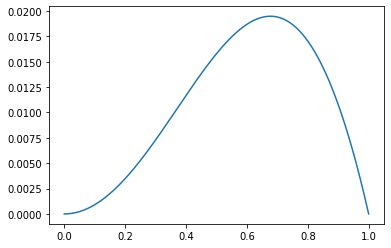

In [13]:
plt.plot(xp,up)

In [14]:
V.ndof

41

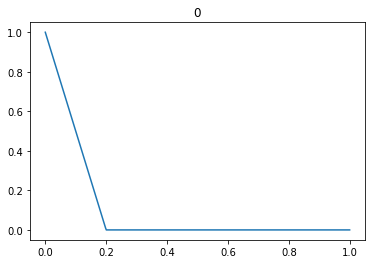

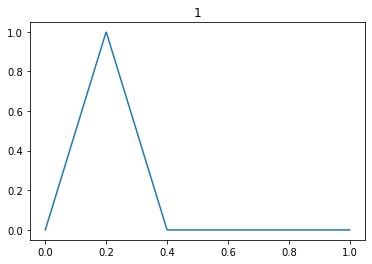

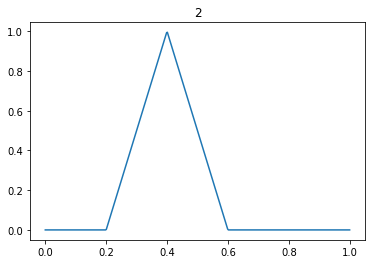

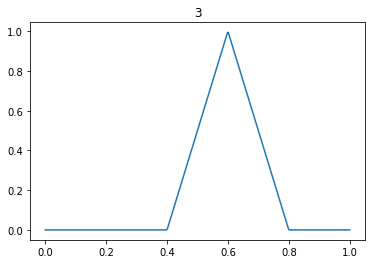

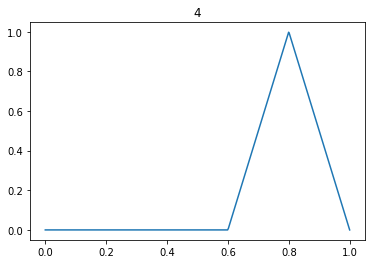

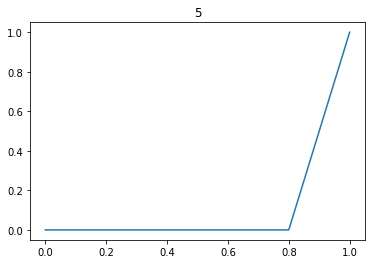

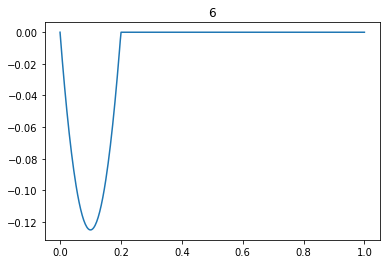

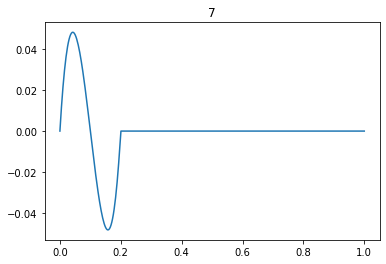

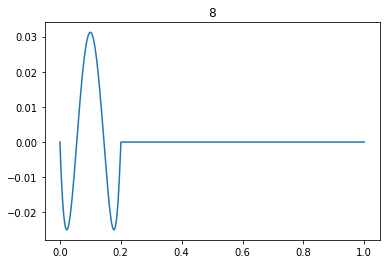

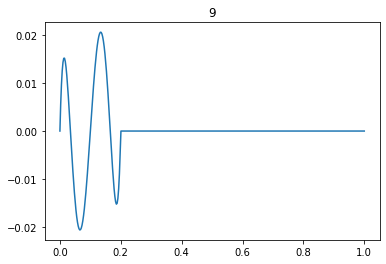

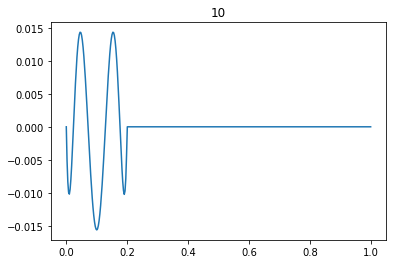

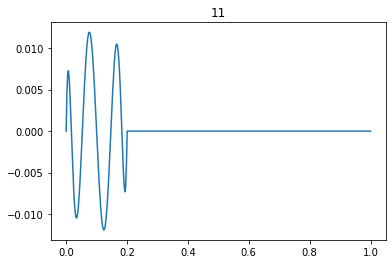

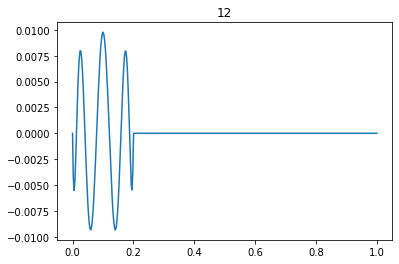

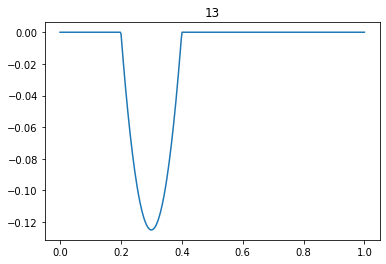

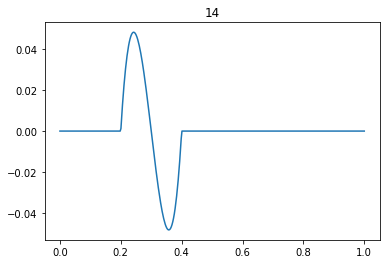

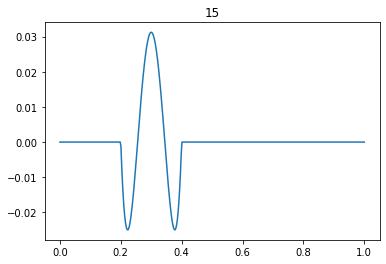

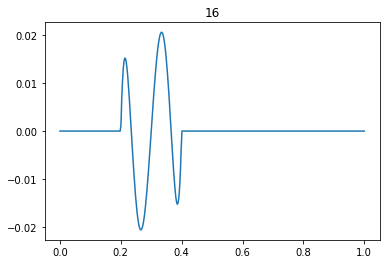

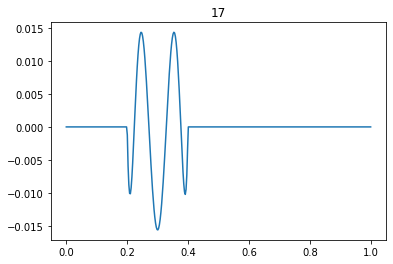

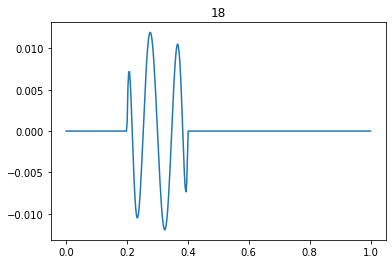

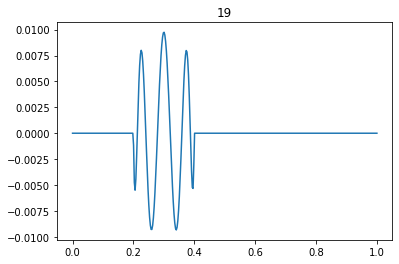

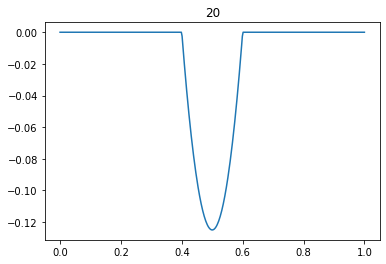

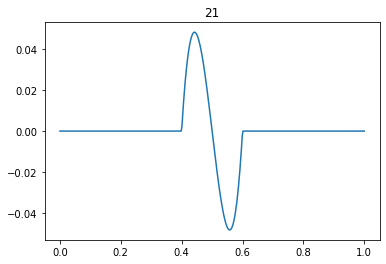

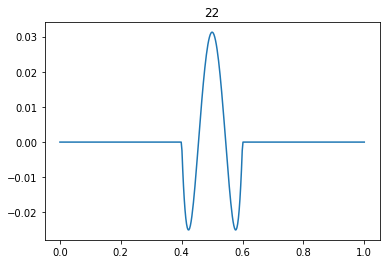

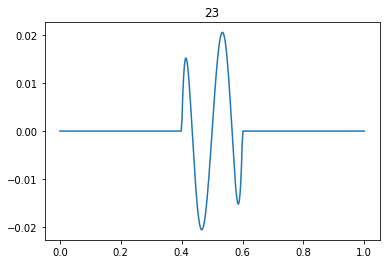

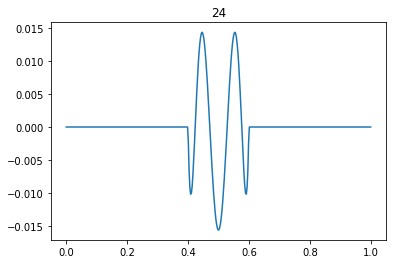

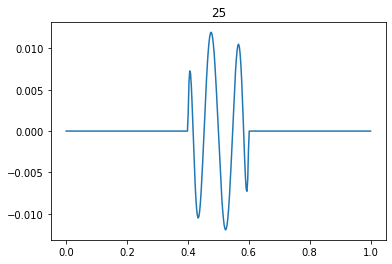

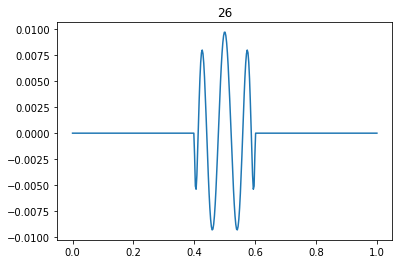

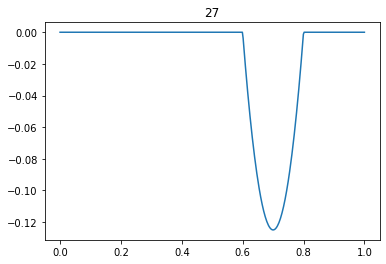

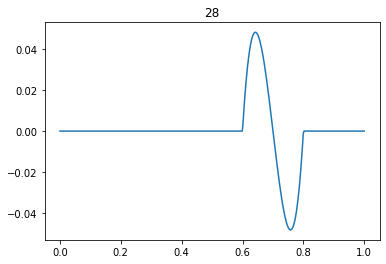

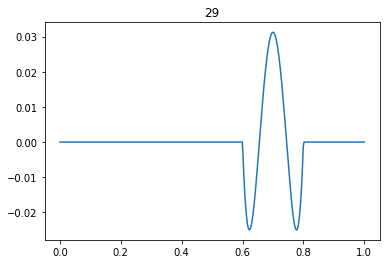

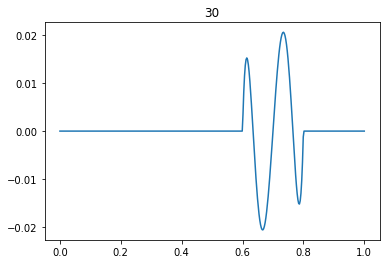

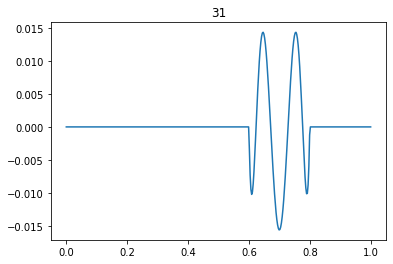

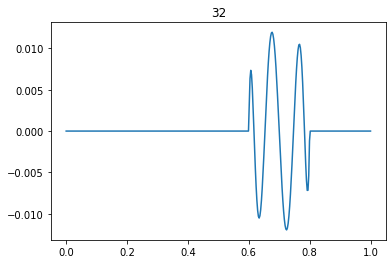

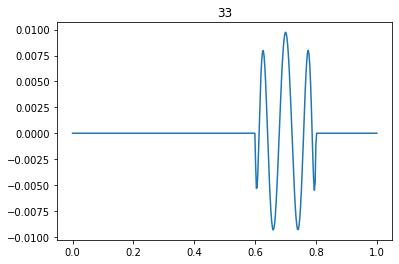

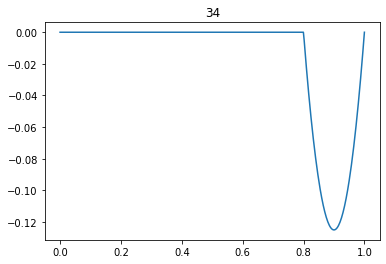

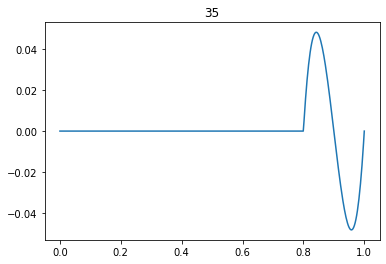

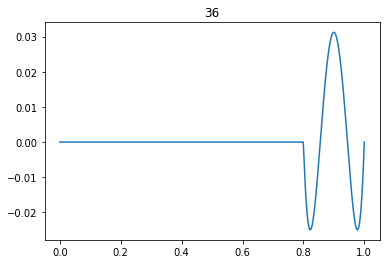

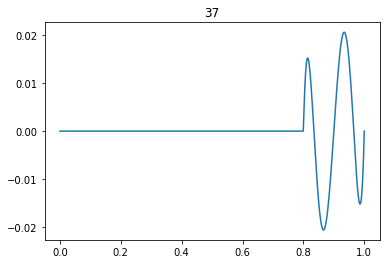

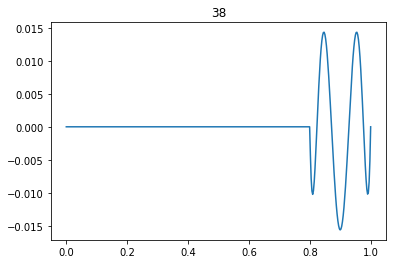

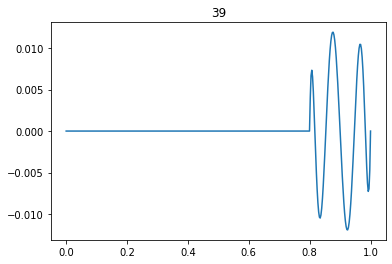

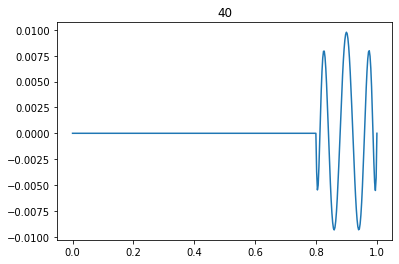

In [15]:
for k in range(V.ndof):
    gfu.vec.FV()[:] = 0
    gfu.vec.FV()[k] = 1
    up = np.array([gfu(mesh(xpi)) for xpi in xp])
    plt.plot(xp,up)
    plt.title(str(k))
    plt.show()

# Übung 2

In [25]:
V = H1(mesh,order = 4, dirichlet='left|right')
#u,v = V.TnT()
u = V.TrialFunction()
v = V.TestFunction()

In [26]:
a = BilinearForm(V)
a += (grad(u)*grad(v))*dx # Steifigkeit
a += -(u*v)*dx # Massenmatrix

In [27]:
f = LinearForm(V)
f += cos(x)*v*dx

In [28]:
a.Assemble()
f.Assemble()

assemble VOL element 5/5                                 


assemble VOL element 5/5                                 


In [1]:
mesh.GetBoundaries()

NameError: name 'mesh' is not defined

In [29]:
gfu = GridFunction(V)
gfu.vec.data = a.mat.Inverse(freedofs=V.FreeDofs())*f.vec

call umfpack ... done


In [30]:
xp = np.linspace(0,1,400)
up = np.array([gfu(mesh(xpi)) for xpi in xp])

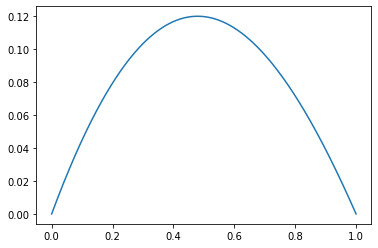

In [31]:
plt.plot(xp,up)